# MATH 3375 Examples Notebook #5
# Regression with a Categorical Predictor

In the simple linear regression, we typically think of the predictor ($x$) as a quantitative variable. However, it is possible to use a categorical predictor by using binary coding (0 or 1) for the different categories. A variable can represent a single category; it is coded as a 1 if the data point belongs to that category, or 0 if it does not. Variables defined this way can be used in a linear regression model.


# Regression Example

We will use the Iris data set again, with the categorical variable _Species_ to illustrate this type of regresison model. Our response variable is still Petal Length (in centimeters).

In [1]:
head(iris)   # See the first few rows of Iris data set


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## Step 1. Exploratory Data Analysis (EDA)

We have already performed exploratory data analysis for distribution of the response variable in previous lessons.  We proceed to re-examine the relationship between petal length and species.


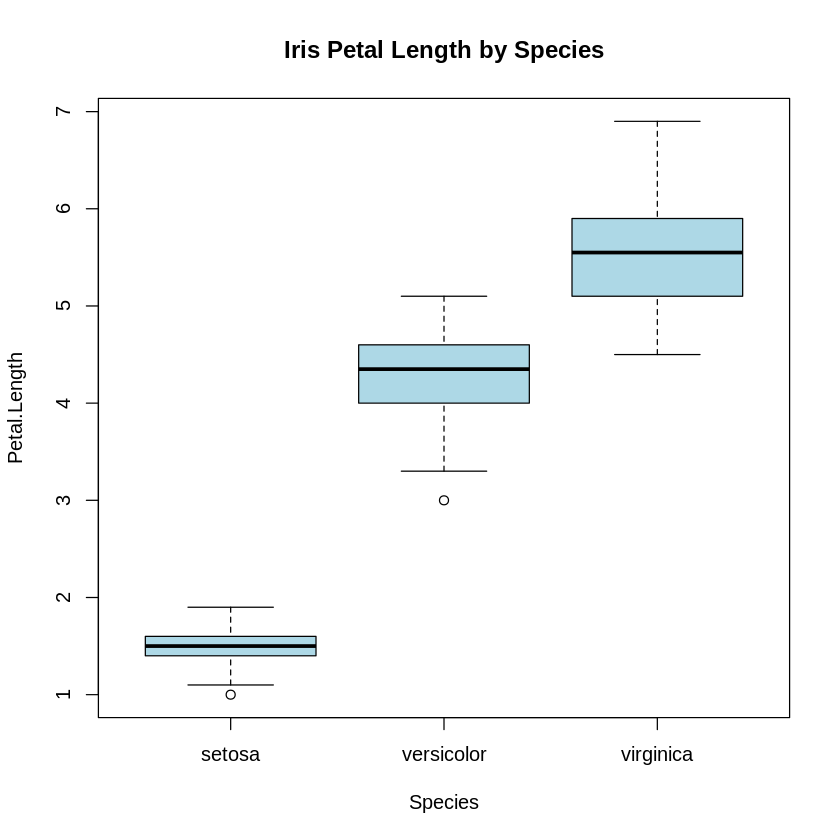

In [2]:
boxplot(Petal.Length ~ Species, data=iris, main="Iris Petal Length by Species", col="lightblue")

## Step 2. The Linear Model

Since there are 3 species, we can treat the first species (Setosa) as the "default" or "baseline" and define 2 additional variables for the other two species.  Then the _Species_ variable will be represented as follows by those 2 variables:

| Species | versicolor | virginica |
| ------- |:----------:|:---------:|
| Setosa  |  0 | 0 |
| Versicolor | 1 | 0 |
| Virginica | 0 | 1 |

Note the following about this system:

- Even though there are three possible values for _Species_, we only need 2 variables. One value is always the baseline.
- At MOST one of the binary variables will be set to 1, since the categorical variable can only have one of the possible values.

R takes care of this coding when the predictor variable is a **_factor_**. Below we define a model that uses species as the independent variable (x) to predict petal length, the response variable (y).

In [3]:
model_iris_02 <- lm(Petal.Length ~ Species, data = iris)
model_iris_02


Call:
lm(formula = Petal.Length ~ Species, data = iris)

Coefficients:
      (Intercept)  Speciesversicolor   Speciesvirginica  
            1.462              2.798              4.090  


### Details to Analyze and Interpret in the Model

#### a. Determine the Estimated Prediction Equation

Notice that the output above is not a full model summary (we will examine the full summary later).  

The output above is only the list of estimated coefficients: the intercept and **_two_** other coefficients. Our one categorical predictor gave us 2 variables in the prediction equation, so we can call the estimated coefficients $\widehat{\beta}_1$ and $\widehat{\beta}_2$, corresponding to _Speciesversicolor_ ($x_1$) and _Speciesvirginica_ ($x_2$), as shown in the output above.

This **_estimated_** prediction equation is as follows:  
$\widehat{y}=a + b_1x_1 + b_2x_2$

where 
- $a$ represents $\widehat{\beta}_0$, the estimated intercept; 
- $b_1$ represents $\widehat{\beta}_1$, the estimated coefficient for $x_1$; and 
- $b_2$ represents $\widehat{\beta}_2$, the estimated coefficient for $x_2$.  

Using the values in the model summary, we see that the the estimated equation is 

$\widehat{y} = 1.462 + 2.798x_1 + 4.09x_2$

OR

$\widehat{Petal.Length} = 1.462 + 2.798Speciesversicolor + 4.09Speciesvirginica$

#### b. Interpret the Prediction Equation 

We can see in the output that there is a variable identifying the versicolor and the virginica species, but no variable for the setosa species.  This is consistent with the table of binary encoding shown previously:

| Species | versicolor | virginica |
| ------- |:----------:|:---------:|
| Setosa  |  0 | 0 |
| Versicolor | 1 | 0 |
| Virginica | 0 | 1 |

Using these codes with the prediction equation above, we can compute the following predicted petal lengths.

| Species | Predicted Petal Length |    |
| ------- |---------------------------------------------------------------:|:----|
| Setosa  |  $\widehat{y} = 1.462 + 2.798(0)$|$+$ $4.09(0) = 1.462$ |
| Versicolor | $\widehat{y} = 1.462 + 2.798(1)$|$+$ $4.09(0) = 4.26$  | 
| Virginica | $\widehat{y} = 1.462 + 2.798(0)$|$+$ $4.09(1) = 5.552$ | 

We can also use the _predict_ command in R to compute model predictions:

In [4]:
new_iris_data <- data.frame(Species = c("virginica","setosa","virginica","versicolor"))
predict(model_iris_02, new_iris_data)

1     2     3     4 
5.552 1.462 5.552 4.260

The plot below allows us to visualize the **_predicted_** petal length by species.

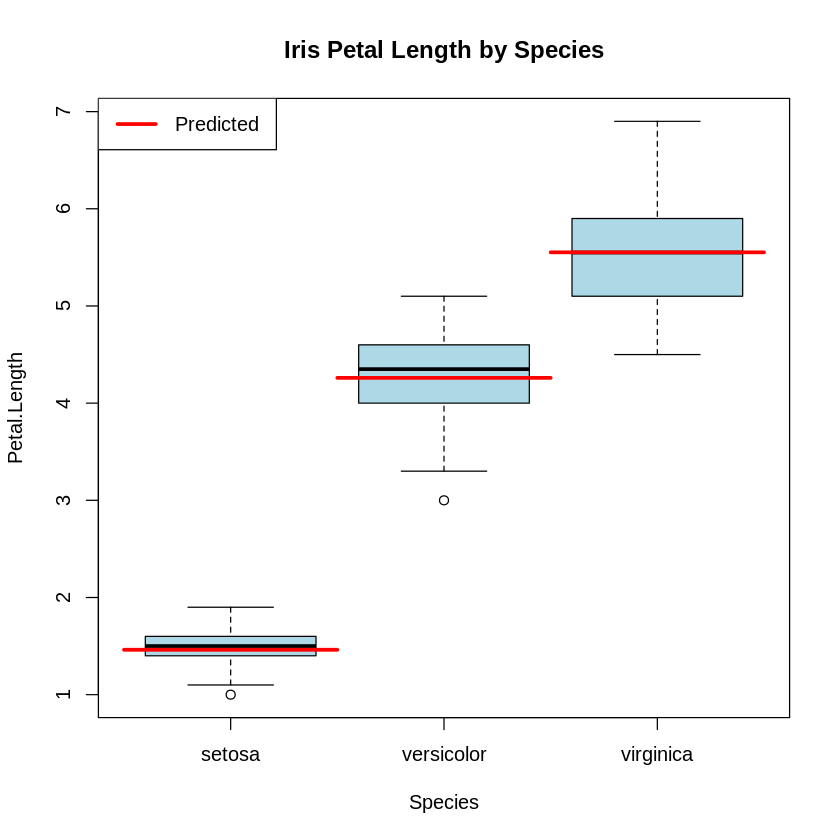

In [5]:
boxplot(Petal.Length ~ Species, data=iris, main="Iris Petal Length by Species", col="lightblue")
segments(0.5,1.462,1.5,1.462,col="red",lwd=3)
segments(1.5,4.26,2.5,4.26,col="red",lwd=3)
segments(2.5,5.552,3.5,5.552,col="red",lwd=3)
legend("topleft",
       legend = "Predicted",
       lwd = 3,
       col = "red")

##### More Insight: Another Type of Analysis

When we predict a quantitative response variable using only a categorical predictor, we are actually just predicting the **_mean_** value for each group. (The groups are defined by the categorical variable.) In other words:

- The mean petal length of setosa in this sample is 1.462
- The mean petal length of versicolor in this sample is 4.26
- The mean petal length of virginica in this sample is 5.552

**Notice what this means** about the model coefficients:
- The mean petal length of setosa in this sample is **_the intercept_**
- The mean petal length of versicolor in this sample is **_the intercept + the versicolor coefficient_**
- The mean petal length of virginica in this sample is **_the intercept + the virginica coefficient_**

Another way to compare means across different groups is the ANOVA (Analysis of Variance) procedure. This procedure is carried out below.

In [6]:
anova_iris <- aov(Petal.Length ~ Species, data=iris)
model.tables(anova_iris,type="means")

Tables of means
Grand mean
      
3.758 

 Species 
Species
    setosa versicolor  virginica 
     1.462      4.260      5.552 

_**Notice** that the table shows the mean of each group, and **it matches the predicted mean given by the regression model**._

#### c. Check Regression Model Assumptions

The regression model assumptions examine the residuals against predicted values (also called "fitted values"). Therefore, we can use many of the same plots we used to check assumptions when the predictor was quantitative. The only difference appears in the 4th diagnostic plot, where leverage does not apply; instead, the fitted values are plotted against the different categories (factor levels).

Also notice that because the regression can only predict 3 specific values (one for each species), the plots with fitted values have 3 vertical columns of points.

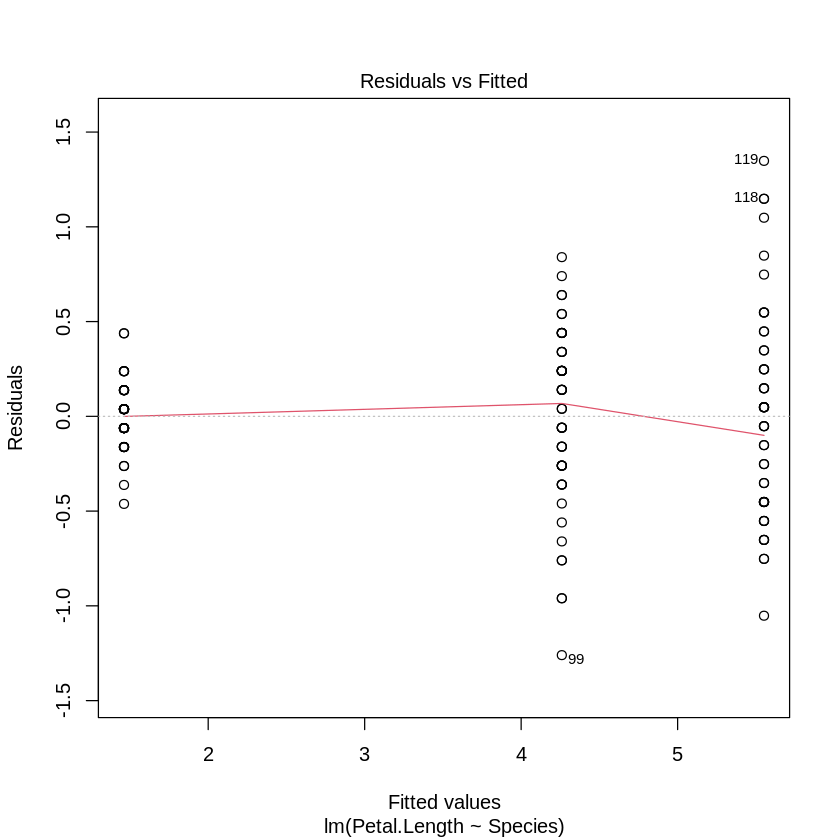

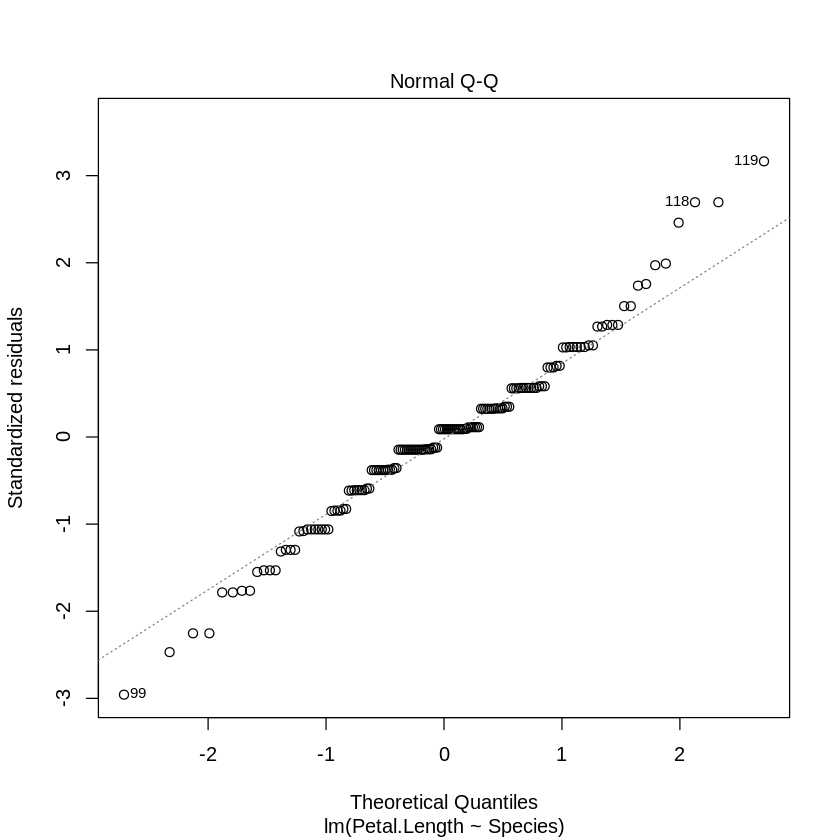

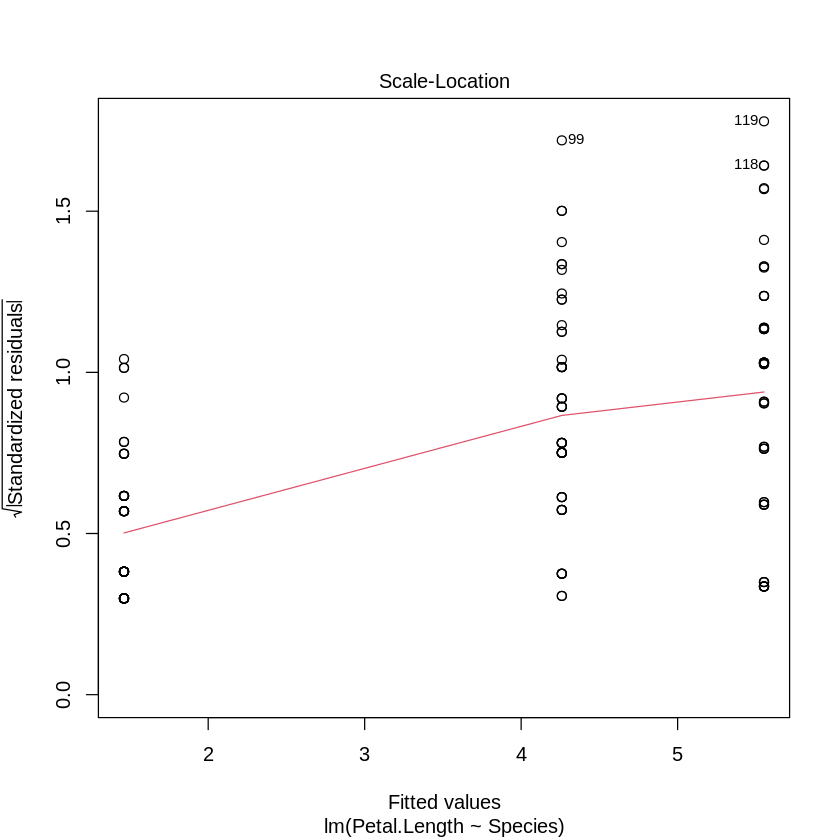

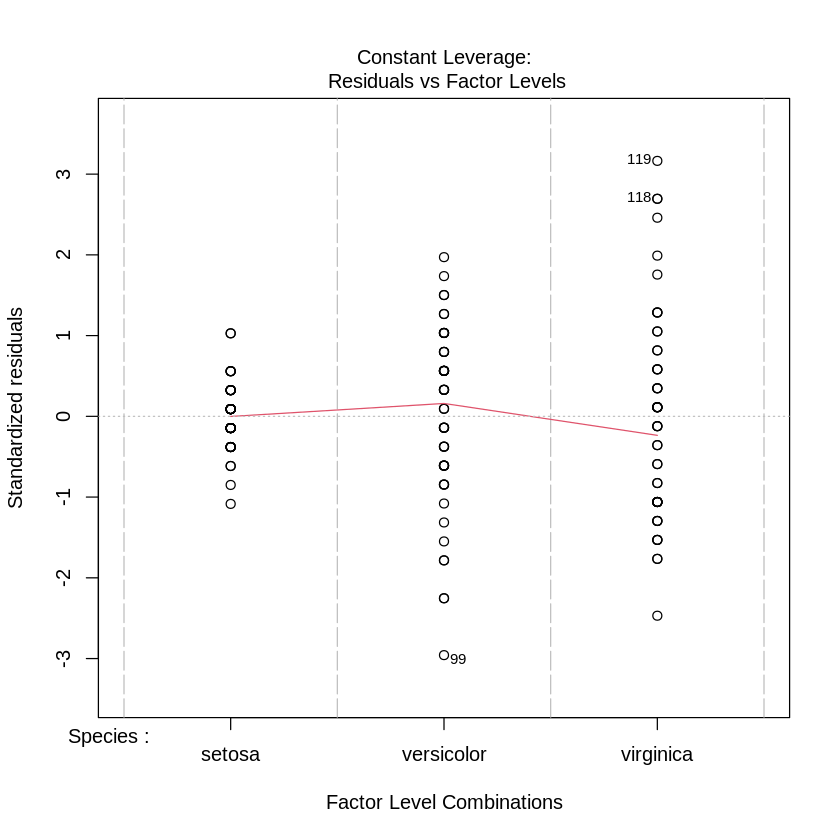

In [7]:
plot(model_iris_02)

#### d. Evaluate Significance of Model

Let's examine the summary of the linear regression model.

In [8]:
summary(model_iris_02)


Call:
lm(formula = Petal.Length ~ Species, data = iris)

Residuals:
   Min     1Q Median     3Q    Max 
-1.260 -0.258  0.038  0.240  1.348 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.46200    0.06086   24.02   <2e-16 ***
Speciesversicolor  2.79800    0.08607   32.51   <2e-16 ***
Speciesvirginica   4.09000    0.08607   47.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4303 on 147 degrees of freedom
Multiple R-squared:  0.9414,	Adjusted R-squared:  0.9406 
F-statistic:  1180 on 2 and 147 DF,  p-value: < 2.2e-16


##### Significance of Coefficients

There is a separate significance test for each coefficient to assess whether the data provide evidence of a relationship between that predictor and the response variable (Petal Length). Below is ONE such significance test:

<center>
$H_0: \beta_{Sp.versicolor} = 0$
</center>

<center>
$H_a: \beta_{Sp.versicolor} \ne 0$
</center>

This is a t-test.  As shown in the output above, $t = 32.51$ and $p \approx 0$. Therefore, we reject the null hypothesis of no relationship, and we conclude that **_iris plants of species versicolor have significantly different petal length than those of the baseline species (setosa)_**.

Note that a similar hypothesis test can be carried out for the **Speciesvirginica** coefficient.

##### Significance of Model

There is also an overall significance test for the model:
<center>
$H_0: \beta_{Sp.versicolor} = \beta_{Sp.virginica} = 0$
</center>

<center>
$H_a:$ At least one $\beta_{i}$ is not zero.
</center>

This test uses the $F$ distribution, which is a _family_ of distributions with TWO degrees of freedom. As shown in the last line of the above output, degrees of freedom are $p=2$ ($p$ is number of predictors in the model) and 147 ($n-p-1$). For these degrees of freedom, we see that $F = 1180$ and $p \approx 0$.  Therefore, we reject the null hypothesis that ALL coefficients are zero, and conclude that at least one is non-zero.  This is equivalent to concluding that the model itself is significant.

##### More Insight: Revisiting ANOVA

Recall the other analysis we carried out above using ANOVA. Below we examine the details from that model. 

In [9]:
model.tables(anova_iris,type="means")

Tables of means
Grand mean
      
3.758 

 Species 
Species
    setosa versicolor  virginica 
     1.462      4.260      5.552 

The table output from this analysis gives us the individual group means and the overall or "Grand" mean, which we can visualize in the plot below.

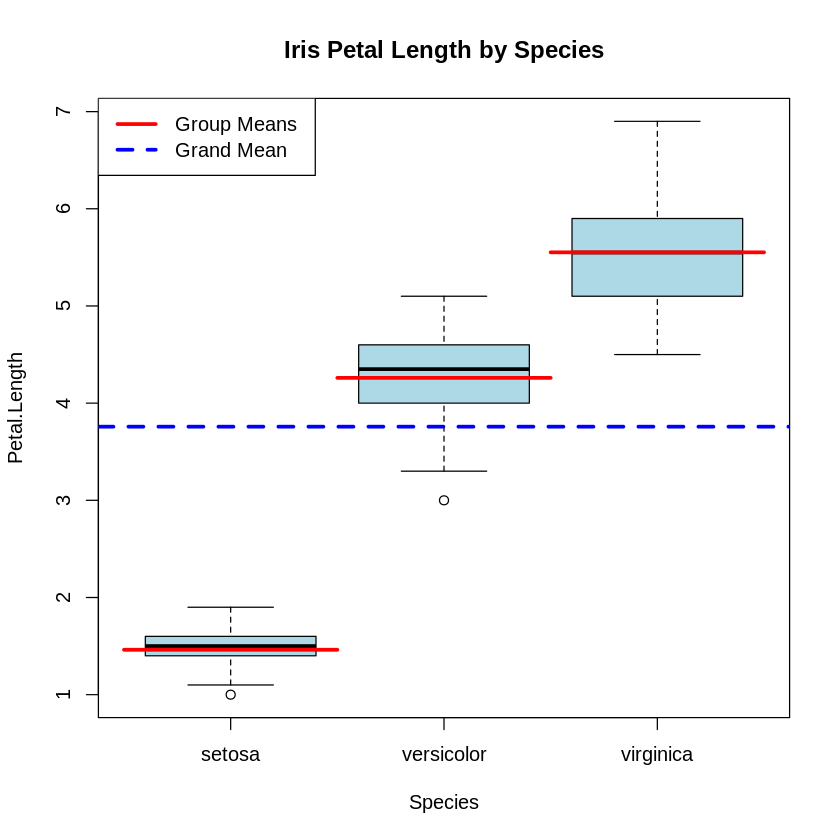

In [10]:
boxplot(Petal.Length ~ Species, data=iris, main="Iris Petal Length by Species", col="lightblue")
segments(0.5,1.462,1.5,1.462,col="red",lwd=3)
segments(1.5,4.26,2.5,4.26,col="red",lwd=3)
segments(2.5,5.552,3.5,5.552,col="red",lwd=3)
abline(h=3.758, col="blue", lty = 2, lwd=3)
legend("topleft",
       legend = c("Group Means", "Grand Mean"),
       lwd = 3,
       lty = c(1,2),
       col = c("red","blue"))

##### ANOVA: ANalysis Of VAriance 

The ANOVA statistical test is used to detect whether ANY statistically significant difference exists among means of multiple groups. In this example, the groups are the different species, and we are comparing the mean petal lengths. 

The hypotheses for this test are formatted as follows:  

<center>
$H_{0}: \mu_1 = \mu_2 = ... = \mu_k$  
</center>
<center>
$H_{a}: $ At least one $\mu_i$ is different
</center>

The test statistic for this test is calculated using the following **RATIO**:  

<center>
$\frac{MSG}{MSE}$
</center>

where $MSG$ represents the mean square variation **_between_** groups, and $MSE$ represents the mean square error **_within_** all groups combined.  

The distribution of possible values for this ratio follows the **_F_** distribution. For the ANOVA test, the _numerator_ degrees of freedom (**df1**) and _denominator_ degrees of freedom (**df2**) are defined as follows:  

<center>
$df1 = k - 1$  
</center>
<center>
$df2 = N - k$
</center>

where $k$ represents the number of **_groups_** and $N$ represents the _total combined sample size_.  

The $MSG$ and $MSE$ are calculated by dividing the associated _Sum of Squares_ (**SS**) by the corresponding degrees of freedom:  
<center>
$MSG = \frac{SSG}{df1}$  
</center>
<center>
$MSE = \frac{SSE}{df2}$
</center>

The Sum of Squares values are computed as follows.

##### TOTAL Sum of Squares (SST)

<center>
$SST = \left [  \sum_{1}^{N}{({x}_i - \overline{X}_G)^{2}} \right ] = SSG + SSE$
</center> 

##### Sum of Squares BETWEEN Groups (SSG)
<center>
$SSG = \sum_{1}^{k}{n_i(\overline{x}_i - \overline{X}_G)^{2}}$  
</center>

##### Sum  of Squares WITHIN Groups (SSE)
<center>
$SSE = SST - SSG$
</center>  

where $n_i$ and $\overline{x}_i$ represent the sample size and mean of each _subgroup_, and $\overline{X}_G$ represents the "_grand mean_" of the combined data set.  


The output from the ANOVA model shows these values: 

In [11]:
summary(anova_iris)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  437.1  218.55    1180 <2e-16 ***
Residuals   147   27.2    0.19                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Values in the above table are rounded, but we can see them to more precision by printing the model itself:

In [12]:
anova_iris

Call:
   aov(formula = Petal.Length ~ Species, data = iris)

Terms:
                 Species Residuals
Sum of Squares  437.1028   27.2226
Deg. of Freedom        2       147

Residual standard error: 0.4303345
Estimated effects may be unbalanced

In this example, we have the following:

<center>
    $df1 = 3 - 1 = 2$
</center>
<br>
<center>
    $df2 = 150 - 3 = 147$   
</center>
<br>
<center>
    $SSG \approx 437.1028 \approx 437.1$   
</center>
<br>
<center>
    $SSE \approx 27.2226 \approx 27.2$   
</center>
<br>
<center>
    $MSG = \frac{437.1028}{2} \approx 218.5514 \approx 218.55$   
</center>
<br>
<center>
    $MSE = \frac{27.2226}{147} \approx 0.18519 \approx 0.19$   
</center>
<br>
<center>
    $F = \frac{218.5514}{0.18519} \approx 1180$   
</center>

##### Comparison of the Linear Regression and ANOVA model

Comparing the ANOVA to the Linear Regression model with a categorical predictor, we can observe the following directly from the figures in the model output above, where $p$ is the number of predictors in the model, and $k$ is the number of groups.

|  | Linear Regression | Analysis of Variance (ANOVA) | Comparison |
|:-----|:-----------------:|:----------------------:|:----------:|
|$df1$| $p = 2$ | $k-1 = 2$| Equivalent|
|$df2$| $n-p-1$ <br> $150-2-1$ <br> $147$| $n - k$ <br> $150 - 3$<br> $147$| Equivalent|
|$F$| $1180$ | $1180$ | Equivalent |
|Residual Std Error| $0.4303$ |$\sqrt{MSE}$ <br> $\sqrt{0.18519}$<br> $0.4303$| Equivalent | 

The two models are fully equivalent.  In fact, you could obtain the same ANOVA output directly from the linear model:


In [13]:
anova(model_iris_02)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Species,2,437.1028,218.5514000,1180.161,2.856777e-91
Residuals,147,27.2226,0.1851878,NA,NA


##### e. Evaluate Predictive Value of the Model

Recall that the $R^2$ value is the measure of how much variance in the response variable $y$ can be accounted for by the model. $R^2$ is specifically a measurement about the linear regression model; it does not apply to the ANOVA procedure that we conducted.

In our model output, $R^2 = 0.9414$ indicating that this model accounts for 94.14% of the variation in petal length. Because having a categorical variable has introduced multiple predictors, the adjusted $R^2$ of $0.9406$ is often preferred as a measure of the model's predictive value, because it avoids the inflation that can occur with multiple predictors. Either way, this metric is about $0.94$.


### Suggestion 

Use one or more code cells below to explore further. (_Hint: Try creating a model with Species AND one of the quantitative features as predictors._)